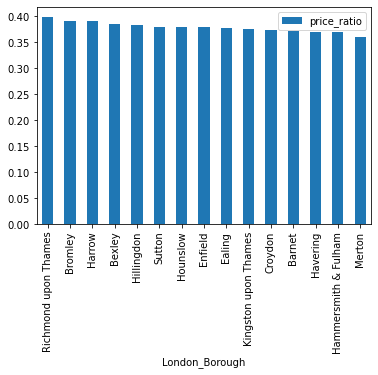

In [398]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt

url_LondonHousePrices = r"https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

properties = properties.transpose().reset_index()

properties.columns = properties.iloc[0]   #rename column using first row

properties = properties.drop([0])   #remove row

properties = properties.rename(columns = {'Unnamed: 0':'London_Borough', pd.NaT : 'ID'})   #???why 'NaN' does not work?

properties_togo = properties.melt(id_vars = ['London_Borough','ID'])

properties_togo = properties_togo.rename(columns = {0: 'Month', 'value': 'Average_price'})

properties_togo['Average_price'] = pd.to_numeric(properties_togo['Average_price'], errors = 'coerce')   # change average_price to float

#print (properties_togo.count())  #to check if any values are missing in dataframe

#print (properties_togo['ID'].isna().sum()) # count the number of NaN in ID column

#print (properties_togo['London_Borough'].unique())  #to check unique elements in the column

properties_togo = properties_togo[properties_togo['ID'].notna()]  # drop NaN from ID column

nonBoroughs = ['Inner London', 'Outer London', 
               'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER', 
               'EAST MIDLANDS', 'WEST MIDLANDS',
              'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 
              'SOUTH WEST', 'England']

properties_togo = properties_togo[~properties_togo.London_Borough.isin(nonBoroughs)]   #filter London_Borough columns based on nonborough list


#properties_togo = properties_togo.assign(year = lambda x: pd.DatetimeIndex(x['Month']).year)    #this is the same as the next line
properties_togo['year'] = pd.DatetimeIndex(properties_togo['Month']).year

properties_grouped = properties_togo.groupby(['London_Borough', 'year']).mean()

properties_grouped = properties_grouped.reset_index()   #reset index after groupby/mean calc


def price_ratio (df):
    x_1998 = df[df['year'] == 1998]['Average_price']
    x_1998 = np.array(x_1998)
    y_2008 = df[df['year'] == 2008][ 'Average_price']
    y_2008 = np.array(y_2008)
    return (float(x_1998/y_2008))

borough_array = properties_grouped['London_Borough'].unique()
final = {}
for location in borough_array:
    borough = properties_grouped[properties_grouped['London_Borough'] == location]
    final[location] = price_ratio(borough)

properties_ratio = pd.DataFrame(final, index = [0])
ratio_updated = properties_ratio.transpose()   
ratio_updated= ratio_updated.reset_index()
ratio_updated = ratio_updated.rename(columns = {'index': 'London_Borough', 0: 'price_ratio'})
ratio_updated = ratio_updated.sort_values(by = 'price_ratio', ascending = False)             
most_15 = ratio_updated.head(15)             

ax = most_15.plot(kind = 'bar', x = 'London_Borough', y = 'price_ratio', rot = 90)
ax.set_xticklabels(most_15.London_Borough)
plt.show()
